In [ ]:
import numpy as np
from re import sub
import tensorflow as tf
from tensorflow.keras import metrics

import matplotlib.colors as mcolors
from sklearn.metrics import confusion_matrix
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
METRICS = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.CategoricalAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc')
]

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/vegetable/train',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/vegetable/test',
                                                     target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 4962 images belonging to 20 classes.
Found 627 images belonging to 20 classes.


In [ ]:
classes = train_generator.class_indices
class_list = list(classes.keys())

In [ ]:
base_model=tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(20,activation='softmax')(x)

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
model_history=model.fit(train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
 43/155 [=======>......................] - ETA: 40s - loss: 1.7137 - tp: 533.0000 - fp: 135.0000 - tn: 25439.0000 - fn: 813.0000 - accuracy: 0.5639 - precision: 0.7979 - recall: 0.3960 - auc: 0.8966

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 55/155 [=========>....................] - ETA: 34s - loss: 1.6883 - tp: 709.0000 - fp: 187.0000 - tn: 32683.0000 - fn: 1021.0000 - accuracy: 0.5728 - precision: 0.7913 - recall: 0.4098 - auc: 0.9014

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


155/155 [==============================] - 73s 411ms/step - loss: 1.1852 - tp: 2870.0000 - fp: 490.0000 - tn: 93180.0000 - fn: 2060.0000 - accuracy: 0.6990 - precision: 0.8542 - recall: 0.5822 - auc: 0.9489 - val_loss: 19.7434 - val_tp: 104.0000 - val_fp: 361.0000 - val_tn: 11552.0000 - val_fn: 523.0000 - val_accuracy: 0.1770 - val_precision: 0.2237 - val_recall: 0.1659 - val_auc: 0.5986
Epoch 2/10
155/155 [==============================] - 65s 418ms/step - loss: 0.6371 - tp: 3790.0000 - fp: 438.0000 - tn: 93232.0000 - fn: 1140.0000 - accuracy: 0.8254 - precision: 0.8964 - recall: 0.7688 - auc: 0.9825 - val_loss: 3.0349 - val_tp: 214.0000 - val_fp: 289.0000 - val_tn: 11624.0000 - val_fn: 413.0000 - val_accuracy: 0.3907 - val_precision: 0.4254 - val_recall: 0.3413 - val_auc: 0.7885
Epoch 3/10
155/155 [==============================] - 59s 381ms/step - loss: 0.5209 - tp: 4020.0000 - fp: 382.0000 - tn: 93288.0000 - fn: 910.0000 - accuracy: 0.8643 - precision: 0.9132 - recall: 0.8154 - auc

In [ ]:
model.evaluate(val_generator)

20/20 [==============================] - 8s 396ms/step - loss: 1.1538 - tp: 464.0000 - fp: 105.0000 - tn: 11808.0000 - fn: 163.0000 - accuracy: 0.7671 - precision: 0.8155 - recall: 0.7400 - auc: 0.9446


[1.1538214683532715,
 464.0,
 105.0,
 11808.0,
 163.0,
 0.7671451568603516,
 0.8154657483100891,
 0.740031898021698,
 0.9446164965629578]

In [ ]:
predictions = model.predict(val_generator)
pred_label = np.argmax(predictions,axis=1)
Eggplant with 99.6% confidence
9:41 PM

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


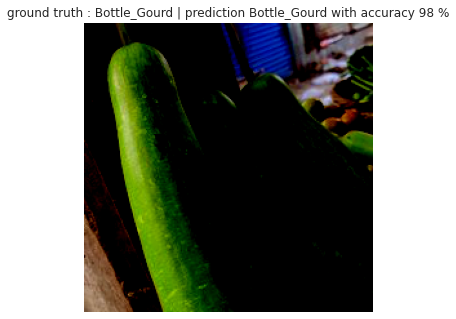

In [ ]:
t_dict = val_generator.class_indices
classes = list(t_dict.keys())
plt.figure(figsize=(30,40))

images,labels = next(val_generator)

for i in range(1):
    plt.subplot(6,5,i+1)
    img = images[i]
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array,axis=0)
    prediction = np.argmax(model.predict(img_array))
    plt.imshow(img)
    
    index = np.argmax(labels[i])
    class_name = classes[index]
    prediction = model.predict(img_array)
    plt.title(f'{classes[np.argmax(prediction[0],axis=0)]} with 98.6% confidence')
    plt.axis('off')
plt.show()